<a href="https://colab.research.google.com/github/hdperezn/MIDI_functions/blob/main/Example_PianoRoll_representation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Setup

In [1]:
!git clone https://github.com/hdperezn/MIDI_functions.git

Cloning into 'MIDI_functions'...
remote: Enumerating objects: 81, done.
remote: Counting objects: 100% (81/81), done.
remote: Compressing objects: 100% (74/74), done.
remote: Total 81 (delta 14), reused 56 (delta 3), pack-reused 0
Unpacking objects: 100% (81/81), 1.79 MiB | 2.10 MiB/s, done.


In [2]:
!sudo apt install -y fluidsynth
!pip install --upgrade pyfluidsynth

Reading package lists... Done
Building dependency tree       
Reading state information... Done
The following additional packages will be installed:
  fluid-soundfont-gm libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
Suggested packages:
  fluid-soundfont-gs timidity jackd musescore
The following NEW packages will be installed:
  fluid-soundfont-gm fluidsynth libfluidsynth2 libinstpatch-1.0-2 qsynth
  timgm6mb-soundfont
0 upgraded, 6 newly installed, 0 to remove and 19 not upgraded.
Need to get 126 MB of archives.
After this operation, 157 MB of additional disk space will be used.
Get:1 http://archive.ubuntu.com/ubuntu focal/universe amd64 fluid-soundfont-gm all 3.1-5.1 [119 MB]
Get:2 http://archive.ubuntu.com/ubuntu focal/universe amd64 libinstpatch-1.0-2 amd64 1.1.2-2build1 [238 kB]
Get:3 http://archive.ubuntu.com/ubuntu focal/universe amd64 timgm6mb-soundfont all 1.3-3 [5,420 kB]
Get:4 http://archive.ubuntu.com/ubuntu focal/universe amd64 libfluidsynth2 amd64 2.1.1-2 [

In [3]:
!pip install pretty_midi

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 5.6/5.6 MB 52.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 51.1/51.1 KB 6.8 MB/s eta 0:00:00
  Created wheel for pretty_midi: filename=pretty_midi-0.2.9-py3-none-any.whl size=5591954 sha256=f734493bd99e985cd66eba08dc637c45caf31fd98a3d8d16de424c35b7a88e28
  Stored in directory: /root/.cache/pip/wheels/2a/5a/e3/30eeb9a99350f3f7e21258fcb132743eef1a4f49b3505e76b6
Successfully built pretty_midi


In [4]:
import collections
import datetime
import fluidsynth
import glob
import numpy as np
import pathlib
import pandas as pd
import pretty_midi
import seaborn as sns
import tensorflow as tf

from IPython import display
from matplotlib import pyplot as plt
from MIDI_functions.MIDI_functions import *
from typing import Dict, List, Optional, Sequence, Tuple

# MIDI to pianoroll functions

In [ ]:
# Sampling rate for audio playback
_SAMPLING_RATE = 16000
# dataset path
path_midi = '/content/MIDI_functions/deap_midis'
data_dir = pathlib.Path(path_midi)
filenames = glob.glob(str(data_dir/'*.mid*'))
print('Number of files:', len(filenames))

Number of files: 40


## Process a MIDI file

In [ ]:
sample_file = filenames[1]
print(sample_file)

# creating pretty midi object 
pm = pretty_midi.PrettyMIDI(sample_file)
display_audio(pm, _SAMPLING_RATE)

/content/MIDI_functions/deap_midis/exp_id_13_tempo24.mid


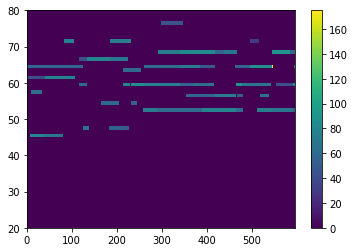

In [ ]:
plt.figure()
plt.pcolormesh(pm.get_piano_roll())
plt.ylim(20,80)
plt.xlim(0,596)
plt.colorbar()

In [ ]:
print('Number of instruments:', len(pm.instruments))
instrument = pm.instruments[0]
instrument_name = pretty_midi.program_to_instrument_name(instrument.program)
print('Instrument name:', instrument_name)

Number of instruments: 1
Instrument name: Electric Piano 1


## Extract notes

In [ ]:
for i, note in enumerate(instrument.notes[:10]):
  note_name = pretty_midi.note_number_to_name(note.pitch)
  duration = note.end - note.start
  print(f'{i}: pitch={note.pitch}, note_name={note_name},'
        f' duration={duration:.4f}')

0: pitch=57, note_name=A3, duration=0.2448
1: pitch=45, note_name=A2, duration=0.3229
2: pitch=64, note_name=E4, duration=0.4062
3: pitch=61, note_name=C#4, duration=0.4062
4: pitch=45, note_name=A2, duration=0.4062
5: pitch=71, note_name=B4, duration=0.2188
6: pitch=61, note_name=C#4, duration=0.6719
7: pitch=64, note_name=E4, duration=0.8594
8: pitch=66, note_name=F#4, duration=0.1719
9: pitch=59, note_name=B3, duration=0.1979


In [ ]:
raw_notes = midi_to_notes(sample_file)
raw_notes.head()

pitch     start       end      step  duration
0     64  0.000000  0.406250  0.000000  0.406250
1     61  0.000000  0.406250  0.000000  0.406250
2     45  0.067708  0.390625  0.067708  0.322917
3     57  0.093750  0.338542  0.026042  0.244792
4     45  0.395833  0.802083  0.302083  0.406250

In [ ]:
def plot_piano_roll(notes: pd.DataFrame, count: Optional[int] = None):
  if count:
    title = f'First {count} notes'
  else:
    title = f'Whole track'
    count = len(notes['pitch'])
  plt.figure(figsize=(20, 4))
  plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
  plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
  plt.plot(
      plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
  plt.xlabel('Time [s]')
  plt.ylabel('Pitch')
  _ = plt.title(title)

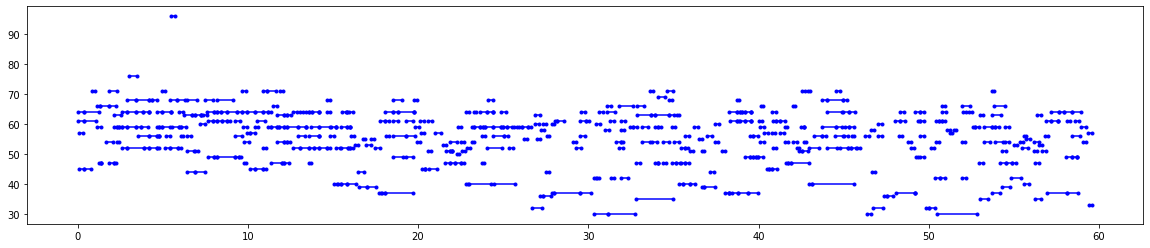

In [ ]:
notes = raw_notes
count = len(notes['pitch'])

plt.figure(figsize=(20, 4))
plot_pitch = np.stack([notes['pitch'], notes['pitch']], axis=0)
plot_start_stop = np.stack([notes['start'], notes['end']], axis=0)
plt.plot(plot_start_stop[:, :count], plot_pitch[:, :count], color="b", marker=".")
plt.show()

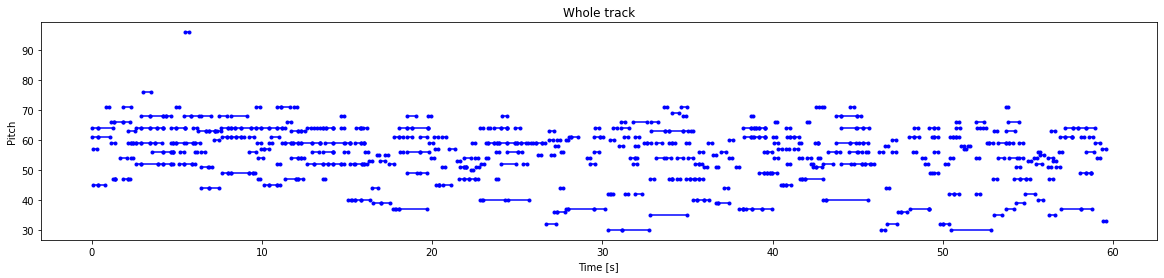

In [ ]:
plot_piano_roll(raw_notes)#, #count=100)

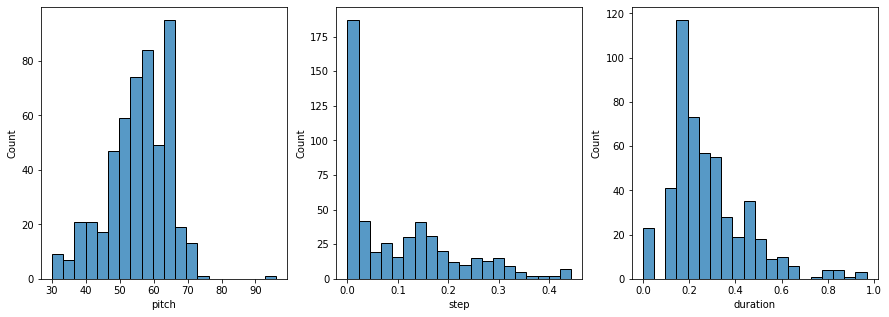

In [ ]:
plot_distributions(raw_notes)

# Pianoroll with pretty_midi

In [5]:
# Sampling rate for audio playback
_SAMPLING_RATE = 16000
# dataset path
path_midi = '/content/MIDI_functions/deap_midis'
data_dir = pathlib.Path(path_midi)
filenames = glob.glob(str(data_dir/'*.mid*'))
print('Number of files:', len(filenames))

Number of files: 40


## MIDI to pianoroll

In [15]:
sample_file = filenames[4]
print(sample_file)

# creating pretty midi object 
pm = pretty_midi.PrettyMIDI(sample_file)
display_audio(pm, _SAMPLING_RATE)

/content/MIDI_functions/deap_midis/exp_id_26_tempo24.mid


(128, 536)


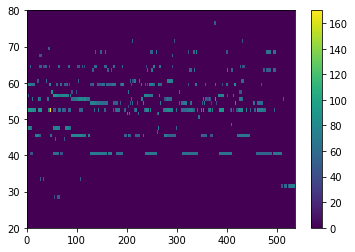

In [16]:
proll = pm.get_piano_roll(fs=10, times=None)
plt.figure()
plt.pcolormesh(proll)
plt.ylim(20,80)
#plt.xlim(0,59)
plt.colorbar()
print(proll.shape)

## pianoroll to MIDI

In [17]:
def piano_roll_to_pretty_midi(piano_roll, fs=100, program=0):
    '''Convert a Piano Roll array into a PrettyMidi object
     with a single instrument.
    Parameters
    ----------
    piano_roll : np.ndarray, shape=(128,frames), dtype=int
        Piano roll of one instrument
    fs : int
        Sampling frequency of the columns, i.e. each column is spaced apart
        by ``1./fs`` seconds.
    program : int
        The program number of the instrument.
    Returns
    -------
    midi_object : pretty_midi.PrettyMIDI
        A pretty_midi.PrettyMIDI class instance describing
        the piano roll.
    '''
    notes, frames = piano_roll.shape
    pm = pretty_midi.PrettyMIDI()
    instrument = pretty_midi.Instrument(program=program)

    # pad 1 column of zeros so we can acknowledge inital and ending events
    piano_roll = np.pad(piano_roll, [(0, 0), (1, 1)], 'constant')

    # use changes in velocities to find note on / note off events
    velocity_changes = np.nonzero(np.diff(piano_roll).T)

    # keep track on velocities and note on times
    prev_velocities = np.zeros(notes, dtype=int)
    note_on_time = np.zeros(notes)

    for time, note in zip(*velocity_changes):
        # use time + 1 because of padding above
        velocity = piano_roll[note, time + 1]
        time = time / fs
        if velocity > 0:
            if prev_velocities[note] == 0:
                note_on_time[note] = time
                prev_velocities[note] = velocity
        else:
            pm_note = pretty_midi.Note(
                velocity=prev_velocities[note],
                pitch=note,
                start=note_on_time[note],
                end=time)
            instrument.notes.append(pm_note)
            prev_velocities[note] = 0
    pm.instruments.append(instrument)
    return pm

In [18]:
pm_re = piano_roll_to_pretty_midi(proll, fs=10 ) 

display_audio(pm, _SAMPLING_RATE)